In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Pooja\Downloads\healthcare-dataset-stroke-data.csv")
data

,36.6,228.69,bmi
0,27.75,202.21,NaN
1,32.50,105.92,NaN
2,34.40,171.23,NaN
3,24.00,174.12,NaN
4,29.00,186.21,NaN
...,...,...,...
5104,27.75,83.75,NaN
5105,40.00,125.20,NaN
5106,30.60,82.99,NaN
5107,25.60,166.29,NaN


In [3]:
data.shape

(5109, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   36.6    5109 non-null   float64
 1   228.69  5109 non-null   float64
 2   bmi     0 non-null      float64
dtypes: float64(3)
memory usage: 119.9 KB


In [5]:
data.describe()

,36.6,228.69,bmi
count,5109.000000,5109.000000,0.0
mean,28.846751,106.123692,NaN
std,7.701216,45.255518,NaN
min,10.300000,55.120000,NaN
25%,23.800000,77.240000,NaN
50%,27.750000,91.880000,NaN
75%,32.800000,114.090000,NaN
max,97.600000,271.740000,NaN


In [6]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Drop ID

In [4]:
Id=data["id"]
Id

0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5110, dtype: int64

In [5]:
data=data.drop(["id"],axis=1)
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
data['stroke'].replace({0: 'No', 1: 'Yes'}, inplace = True)
data['heart_disease'].replace({0: 'No', 1: 'Yes'}, inplace = True)


In [16]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,0,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80.0,0,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,0,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,1,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,No,Yes,Private,Urban,83.75,28.893237,never smoked,No
5106,Female,81.0,0,No,Yes,Self-employed,Urban,125.20,40.000000,never smoked,No
5107,Female,35.0,0,No,Yes,Self-employed,Rural,82.99,30.600000,never smoked,No
5108,Male,51.0,0,No,Yes,Private,Rural,166.29,25.600000,formerly smoked,No


# Missing value Treatment

In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data.bmi=data.bmi.fillna(data.bmi.mean()) # replacing the missing values by mean in bmi column

In [10]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [46]:
x1=pd.crosstab(data["bmi"],data["stroke"])
print(x1)

stroke  No  Yes
bmi            
10.3     1    0
11.3     1    0
11.5     1    0
12.0     1    0
12.3     1    0
...     ..  ...
66.8     1    0
71.9     1    0
78.0     1    0
92.0     1    0
97.6     1    0

[419 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

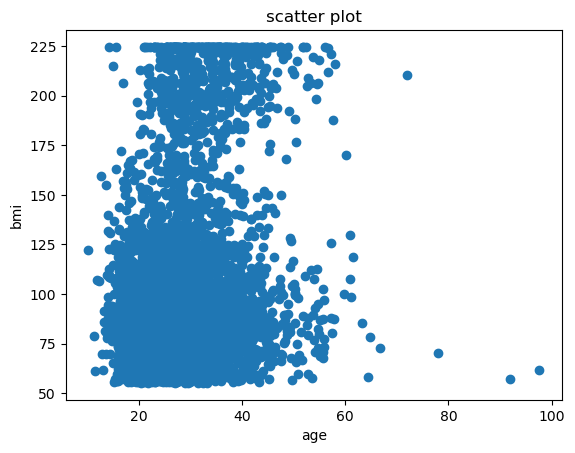

In [48]:
glucose=data["avg_glucose_level"]
bmi=data["bmi"]
plt.xlabel("age")
plt.ylabel("bmi")
plt.title("scatter plot")
plt.scatter(bmi,glucose)
plt.show

# Datatypes conversion 

In [14]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [16]:
data.gender=le.fit_transform(data.gender)

In [17]:
data.gender.value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [18]:
data.ever_married=le.fit_transform(data.ever_married)

In [19]:
data.ever_married.value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [20]:
data.work_type=le.fit_transform(data.work_type)

In [21]:
data.work_type.value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [22]:
data.Residence_type=le.fit_transform(data.Residence_type)

In [23]:
data.Residence_type.value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [24]:
data.smoking_status=le.fit_transform(data.smoking_status)

In [25]:
data.smoking_status.value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [26]:
data.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [27]:
x=data.corr() # To find correlation matrix
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


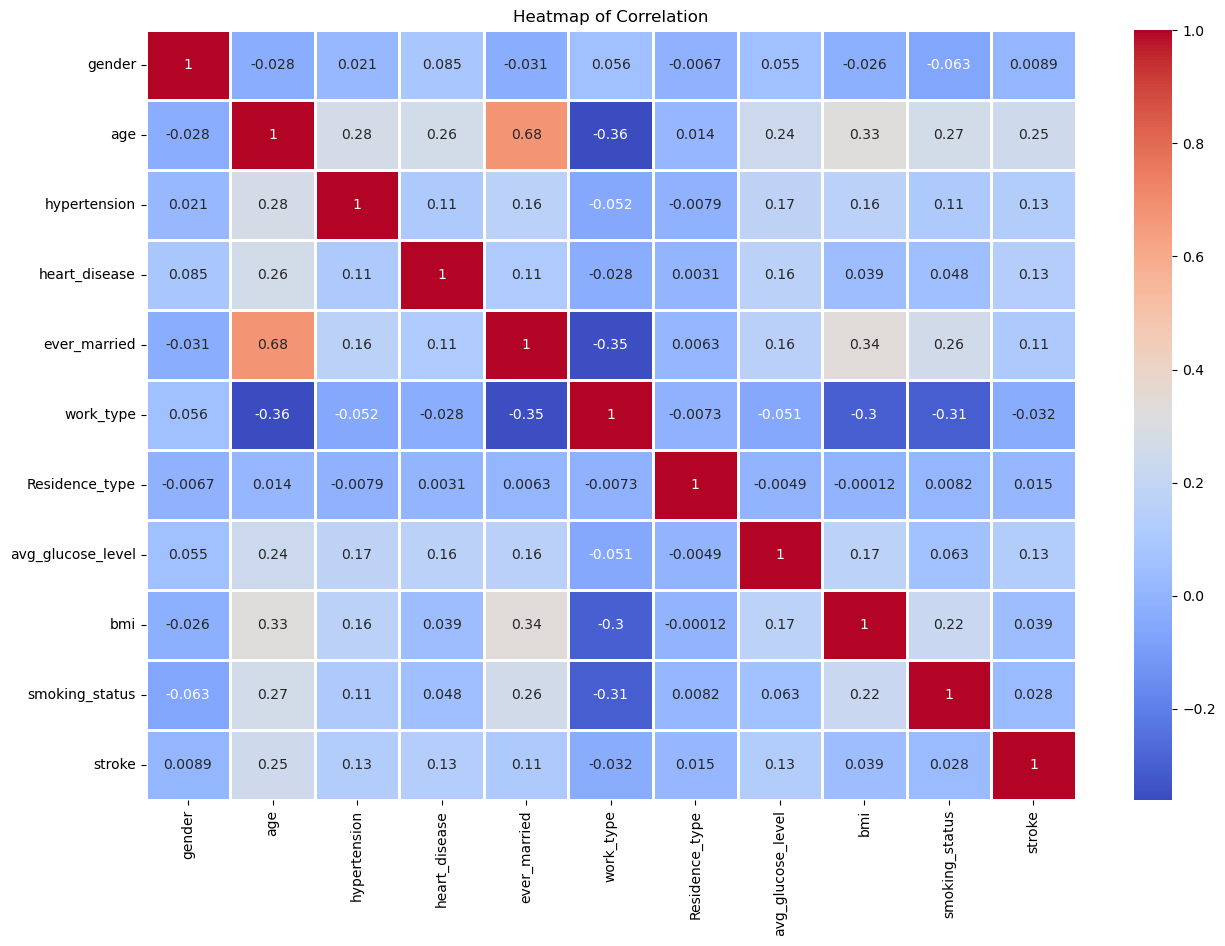

In [28]:
plt.figure(figsize=(15,10))
plt.title("Heatmap of Correlation")
heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap="coolwarm")
plt.show()

# Outlier Treatment

<AxesSubplot:>

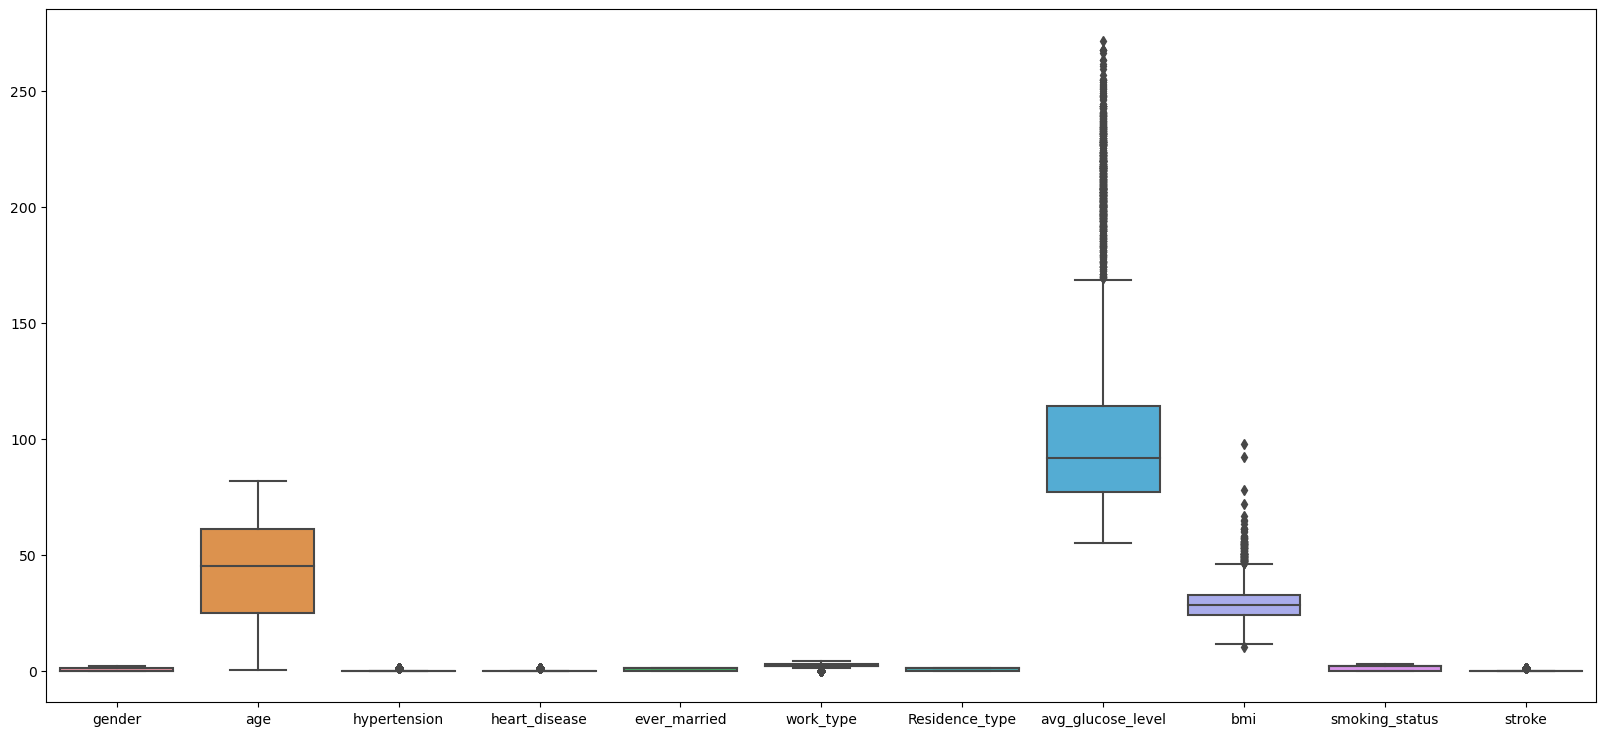

In [29]:
fid=plt.figure(figsize=(20,9))
sns.boxplot(data=data)

# Outlier Treatment for avg_glucose_level column

<AxesSubplot:ylabel='avg_glucose_level'>

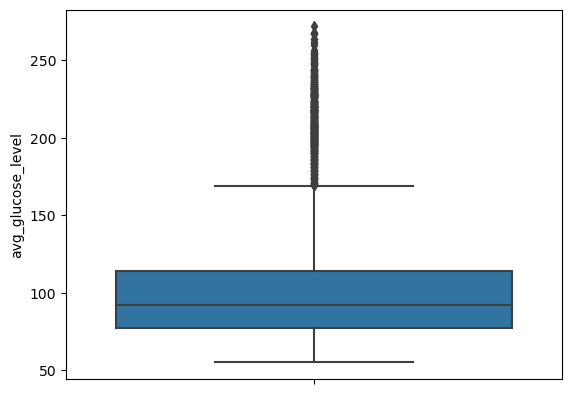

In [29]:
sns.boxplot(data=data,y="avg_glucose_level")

<AxesSubplot:>

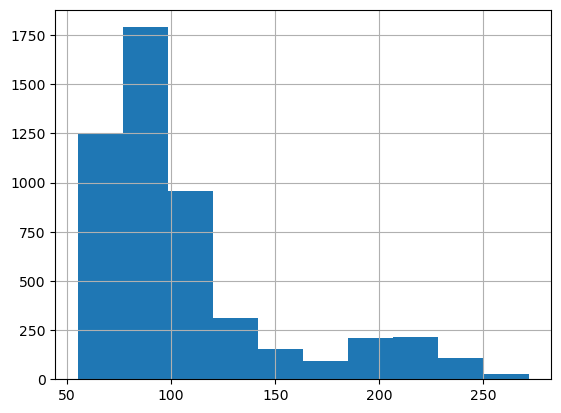

In [30]:
data.avg_glucose_level.hist()

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

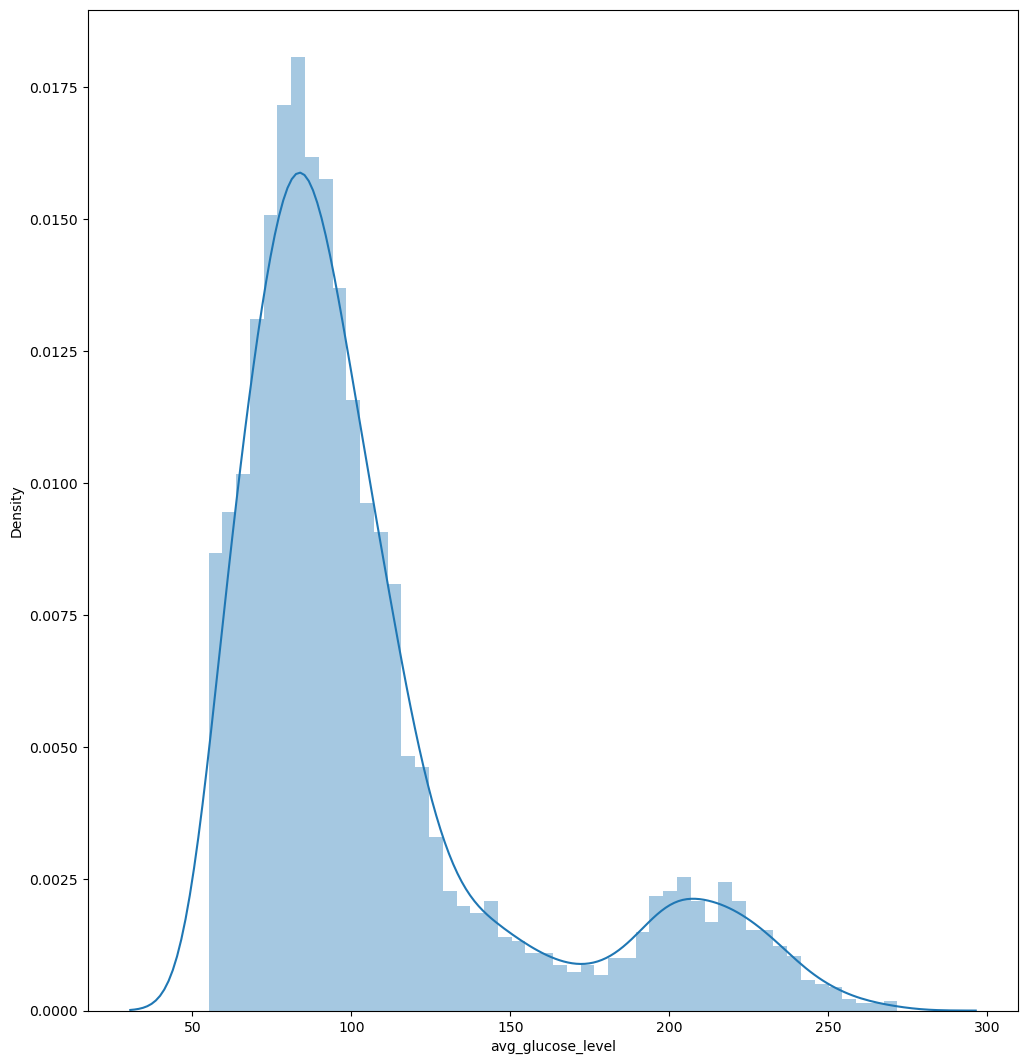

In [31]:
fid=plt.figure(figsize=(12,13)) 
sns.distplot(data.avg_glucose_level)

In [32]:
iqr=data.avg_glucose_level.quantile(0.75)-data.avg_glucose_level.quantile(0.25)
iqr

36.845

In [33]:
data.avg_glucose_level.describe() # avg_glucose_level is numeric variable

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [34]:
data.avg_glucose_level.value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [35]:
lb=data["avg_glucose_level"].quantile(0.25)-(iqr*3)
ub=data["avg_glucose_level"].quantile(0.75)+(iqr*3)
print(lb,ub)

-33.28999999999999 224.625


In [36]:
data.loc[data["avg_glucose_level"]>224.625,"avg_glucose_level"]=224.625

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

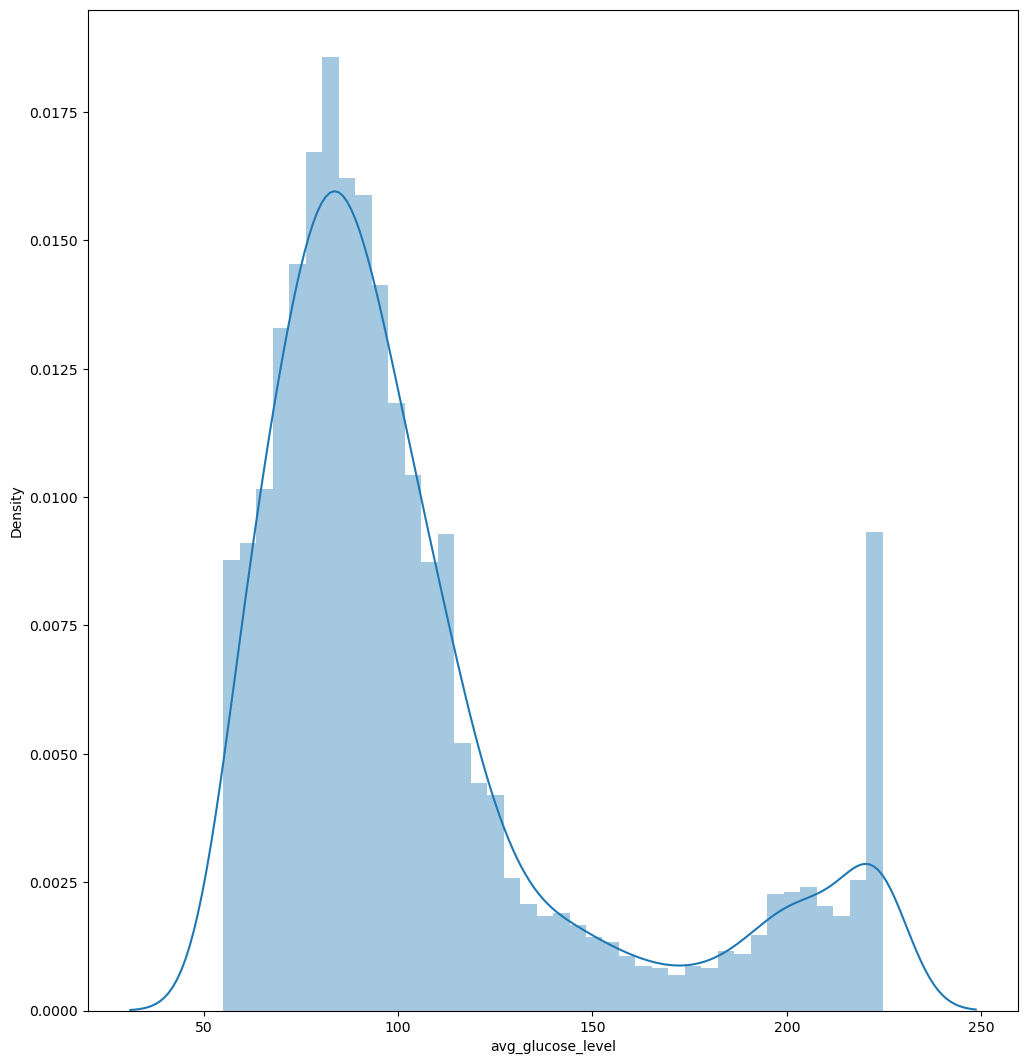

In [37]:
fid=plt.figure(figsize=(12,13))  # Distplot after outlier treatment
sns.distplot(data.avg_glucose_level)

<AxesSubplot:ylabel='avg_glucose_level'>

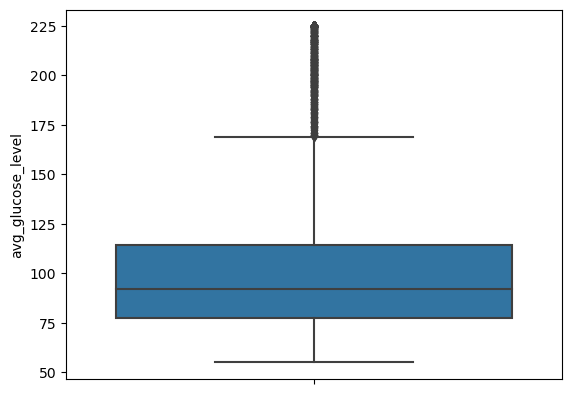

In [39]:
sns.boxplot(data=data,y="avg_glucose_level")

<AxesSubplot:>

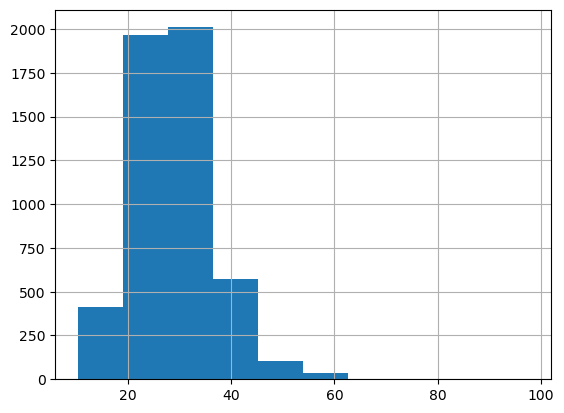

In [40]:
data.bmi.hist()

<AxesSubplot:xlabel='bmi', ylabel='Density'>

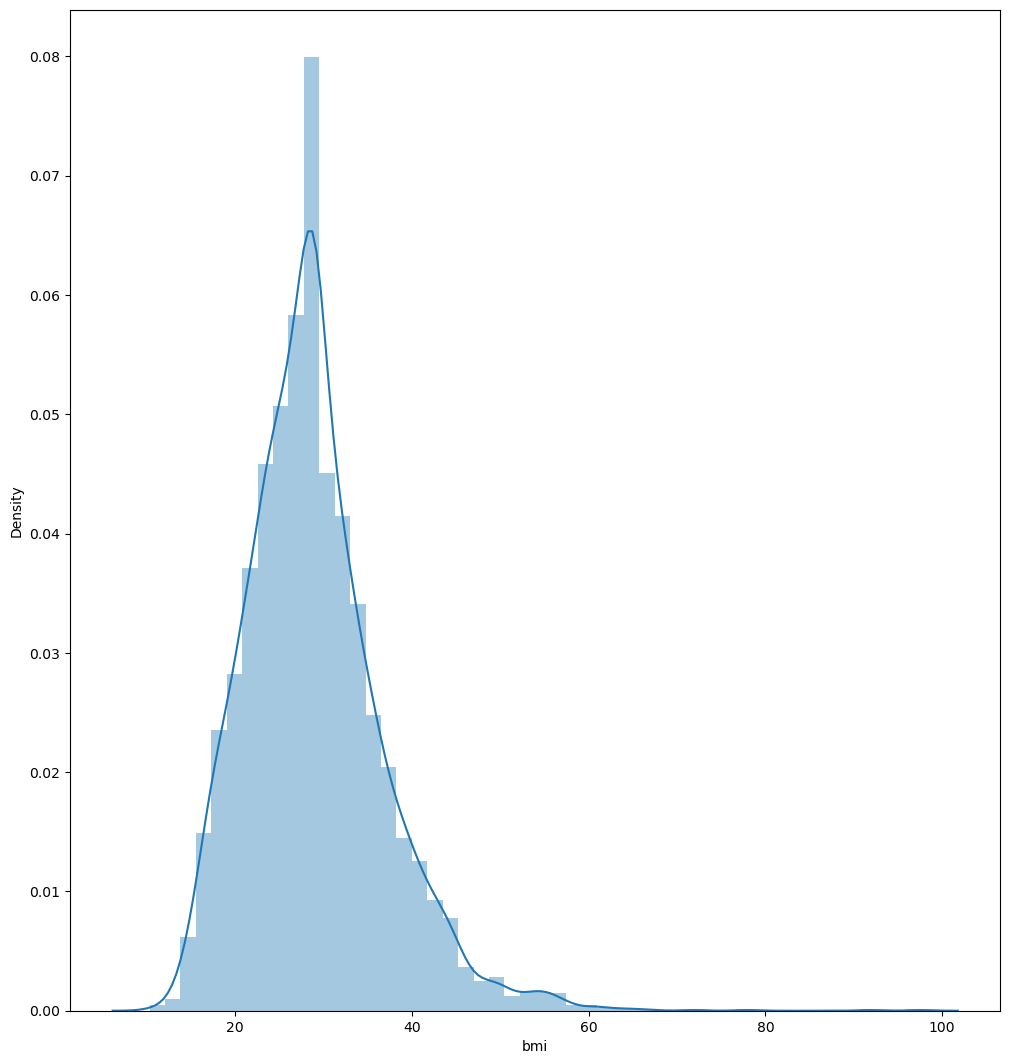

In [41]:
fid=plt.figure(figsize=(12,13)) 
sns.distplot(data.bmi)

In [42]:
iqr=data.bmi.quantile(0.75)-data.bmi.quantile(0.25)
iqr

8.999999999999996

In [43]:
data.bmi.describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [44]:
data.bmi.value_counts()

28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
            ... 
11.500000      1
40.600000      1
53.900000      1
97.600000      1
14.900000      1
Name: bmi, Length: 419, dtype: int64

In [45]:
lb=data["bmi"].quantile(0.25)-(iqr*3)
ub=data["bmi"].quantile(0.75)+(iqr*3)
print(lb,ub)

-3.1999999999999886 59.79999999999998


In [46]:
data.loc[data["bmi"]>59.79999999999998,"bmi"]=59.79999999999998

<AxesSubplot:xlabel='bmi', ylabel='Density'>

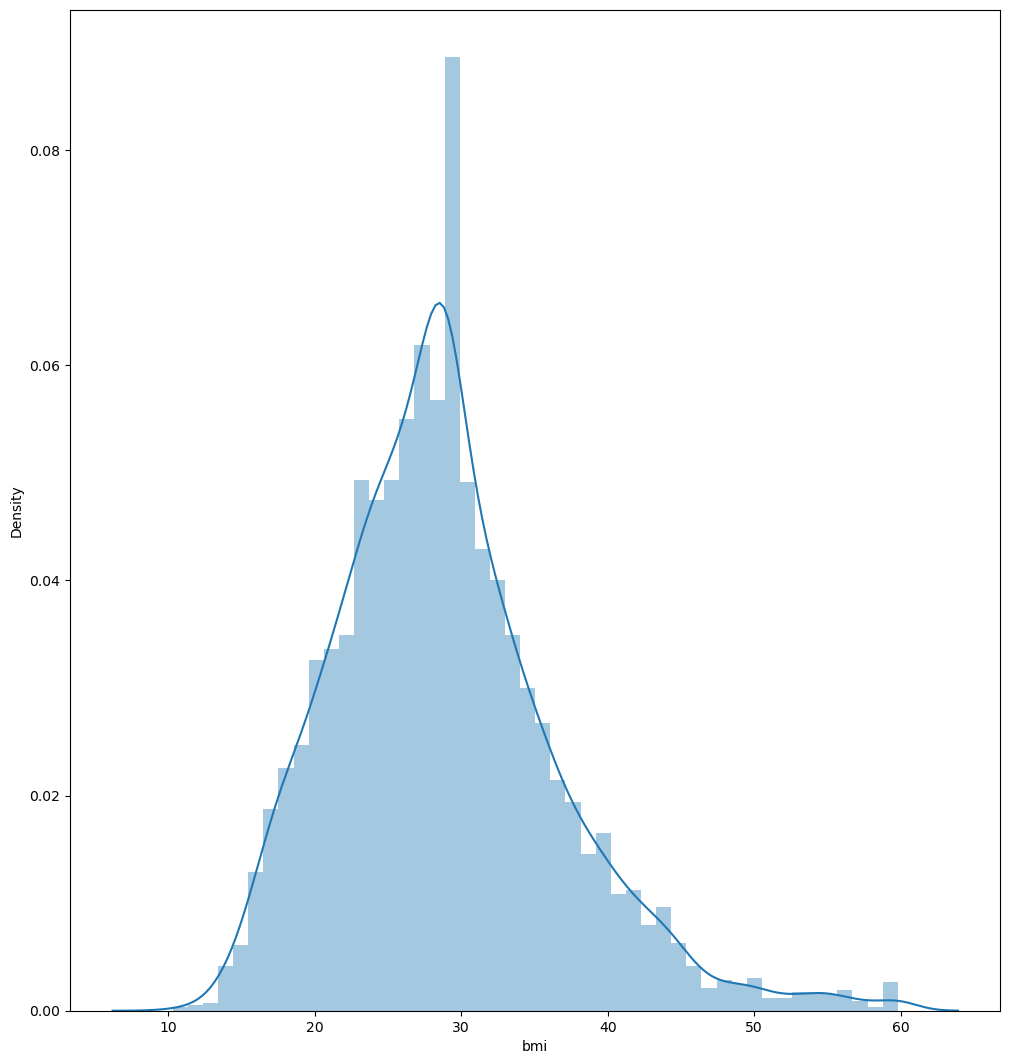

In [47]:
fid=plt.figure(figsize=(12,13))  # Distplot after outlier treatment
sns.distplot(data.bmi)

# Skewness treatment

In [48]:
data.skew()

gender               0.353012
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type           -0.308617
Residence_type      -0.032107
avg_glucose_level    1.484198
bmi                  0.811174
smoking_status      -0.039234
stroke               4.193284
dtype: float64

In [49]:
data.avg_glucose_level.value_counts()

224.625    166
93.880       6
73.000       5
84.100       5
72.490       5
          ... 
125.290      1
89.930       1
137.450      1
72.060       1
85.280       1
Name: avg_glucose_level, Length: 3815, dtype: int64

In [50]:
data.loc[data["avg_glucose_level"]==0]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [51]:
data.avg_glucose_level.skew()

1.4841983963306318

In [52]:
v1=np.log(data.avg_glucose_level)

In [53]:
v1.skew()

0.8404843823595728

In [54]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,224.625,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.210,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.920,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.230,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.120,24.000000,2,1


# separation of data into dependent & independent columns

In [55]:
train_x=data.iloc[:,0:10]
train_y=data.iloc[:,-1]

In [56]:
train_x.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,224.625,36.600000,1
1,0,61.0,0,0,1,3,0,202.210,28.893237,2
2,1,80.0,0,1,1,2,0,105.920,32.500000,2
3,0,49.0,0,0,1,2,1,171.230,34.400000,3
4,0,79.0,1,0,1,3,0,174.120,24.000000,2


In [57]:
train_y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# Preparing the Data for the Model

In [58]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=100)

In [59]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4088, 10), (1022, 10), (4088,), (1022,))

In [60]:
x_train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1098,0,77.0,0,0,1,2,0,75.060,22.0,0
3465,0,28.0,0,0,1,2,0,141.160,36.7,2
3160,0,17.0,0,0,0,2,0,88.650,30.3,2
3594,0,62.0,0,0,1,2,0,224.625,47.4,2
1249,1,15.0,0,0,0,2,0,78.590,25.1,0


In [61]:
x_test.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2918,0,63.0,0,1,1,3,0,224.625,32.2,3
3056,1,62.0,0,1,1,0,0,73.700,26.2,2
4916,1,54.0,0,0,1,0,1,72.960,37.7,3
4003,0,24.0,0,0,0,2,0,147.740,21.4,0
3332,1,27.0,0,0,1,2,1,114.320,28.1,0


In [62]:
y_train.head(5)

1098    0
3465    0
3160    0
3594    0
1249    0
Name: stroke, dtype: int64

In [63]:
y_test.head(5)

2918    0
3056    0
4916    0
4003    0
3332    0
Name: stroke, dtype: int64

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [65]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [66]:
lg.fit(x_train,y_train)

LogisticRegression()

In [67]:
lg_p=lg.predict(x_test)

In [68]:
lg_pr=precision_score(lg_p,y_test)
lg_pr

0.0

In [69]:
lg_re=recall_score(lg_p,y_test)
lg_re

0.0

In [70]:
lg_ac=accuracy_score(lg_p,y_test)
lg_ac

0.9549902152641878

In [71]:
lg_f1=f1_score(lg_p,y_test)
lg_f1

0.0

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
lg_cf=confusion_matrix(lg_p,y_test)
lg_cf

array([[976,  46],
       [  0,   0]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.48      0.49      1022
weighted avg       1.00      0.95      0.98      1022



# Decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [77]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
dt_p=dt.predict(x_test)

In [79]:
dt_pr=precision_score(dt_p,y_test)
dt_pr

0.10869565217391304

In [80]:
dt_re=recall_score(dt_p,y_test)
dt_re

0.10416666666666667

In [81]:
dt_ac=accuracy_score(dt_p,y_test)
dt_ac

0.9178082191780822

In [82]:
dt_f1=f1_score(dt_p,y_test)
dt_f1

0.10638297872340426

In [83]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[933,  41],
       [ 43,   5]], dtype=int64)

In [84]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

91.78082191780823

In [85]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       974
           1       0.11      0.10      0.11        48

    accuracy                           0.92      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.92      0.92      0.92      1022



In [86]:
dt.feature_importances_

array([0.0209774 , 0.21256285, 0.03605356, 0.01285536, 0.02222545,
       0.03975497, 0.03082614, 0.27456736, 0.26929762, 0.08087927])

In [87]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"columns":list(train_x)})
dt_df

,Importance,columns
0,0.020977,gender
1,0.212563,age
2,0.036054,hypertension
3,0.012855,heart_disease
4,0.022225,ever_married
5,0.039755,work_type
6,0.030826,Residence_type
7,0.274567,avg_glucose_level
8,0.269298,bmi
9,0.080879,smoking_status


# Random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [89]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
rf_p=rf.predict(x_test)

In [91]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[974,  46],
       [  2,   0]], dtype=int64)

In [92]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

95.30332681017613

In [93]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1020
           1       0.00      0.00      0.00         2

    accuracy                           0.95      1022
   macro avg       0.50      0.48      0.49      1022
weighted avg       1.00      0.95      0.97      1022



In [94]:
rf_pr=precision_score(rf_p,y_test)
rf_pr

0.0

In [95]:
rf_re=recall_score(rf_p,y_test)
rf_re

0.0

In [96]:
rf_ac=accuracy_score(rf_p,y_test)
rf_ac

0.9530332681017613

In [97]:
rf_f1=f1_score(rf_p,y_test)
rf_f1

0.0

# KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)

In [99]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [100]:
k_p=knn.predict(x_test)


In [101]:
k_cf=confusion_matrix(k_p,y_test)
k_cf

array([[976,  46],
       [  0,   0]], dtype=int64)

In [102]:
k_acc=k_cf.diagonal().sum()/k_cf.sum()*100
k_acc

95.49902152641879

In [103]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.48      0.49      1022
weighted avg       1.00      0.95      0.98      1022



In [104]:
k_pr=precision_score(k_p,y_test)
k_pr

0.0

In [105]:
k_re=recall_score(k_p,y_test)
k_re

0.0

In [106]:
k_ac=accuracy_score(k_p,y_test)
k_ac

0.9549902152641878

In [107]:
k_f1=f1_score(k_p,y_test)
k_f1

0.0

In [108]:
lst=list()

In [109]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kn_pred=knn.predict(x_test)
    cf_k=confusion_matrix(kn_pred,y_test)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

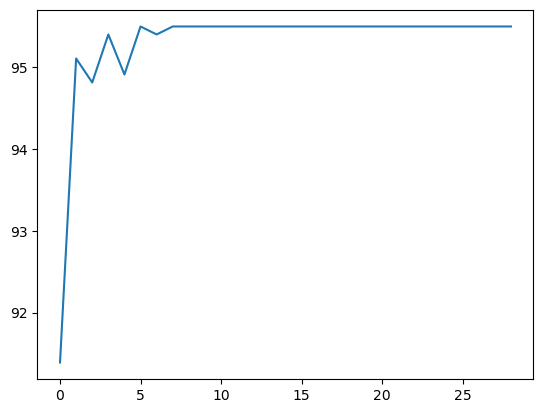

In [110]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# SVM

In [111]:
from sklearn.svm import SVC
svc=SVC()

In [112]:
svc.fit(x_train,y_train)

SVC()

In [113]:
s_p=svc.predict(x_test)
s_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
s_cf=confusion_matrix(s_p,y_test)
s_cf

array([[976,  46],
       [  0,   0]], dtype=int64)

In [115]:
s_acc=s_cf.diagonal().sum()/s_cf.sum()*100
s_acc

95.49902152641879

In [116]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1022
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1022
   macro avg       0.50      0.48      0.49      1022
weighted avg       1.00      0.95      0.98      1022



In [117]:
s_pr=precision_score(s_p,y_test)
s_pr

0.0

In [118]:
s_re=recall_score(s_p,y_test)
s_re

0.0

In [119]:
s_ac=accuracy_score(s_p,y_test)
s_ac

0.9549902152641878

In [120]:
s_f1=f1_score(s_p,y_test)
s_f1

0.0

# naive bayes

In [121]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [122]:
nb.fit(x_train,y_train)

MultinomialNB()

In [123]:
n_p=nb.predict(x_test)

In [124]:
nb_cf=confusion_matrix(n_p,y_test)
nb_cf

array([[799,  26],
       [177,  20]], dtype=int64)

In [125]:
n_acc=nb_cf.diagonal().sum()/nb_cf.sum()*100
n_acc

80.13698630136986

In [126]:
print(classification_report(n_p,y_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       825
           1       0.43      0.10      0.16       197

    accuracy                           0.80      1022
   macro avg       0.63      0.54      0.53      1022
weighted avg       0.74      0.80      0.75      1022



In [127]:
nb_pr=precision_score(n_p,y_test)
nb_pr

0.43478260869565216

In [128]:
nb_re=recall_score(n_p,y_test)
nb_re

0.10152284263959391

In [129]:
nb_ac=accuracy_score(n_p,y_test)
nb_ac

0.8013698630136986

In [130]:
nb_f1=f1_score(n_p,y_test)
nb_f1

0.1646090534979424

# XGBOOST

In [131]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [132]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [133]:
xgb_p=xgb.predict(x_test)

In [134]:
xgb_cf=confusion_matrix(xgb_p,y_test)
xgb_cf

array([[967,  42],
       [  9,   4]], dtype=int64)

In [135]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100

In [136]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1009
           1       0.09      0.31      0.14        13

    accuracy                           0.95      1022
   macro avg       0.54      0.63      0.55      1022
weighted avg       0.98      0.95      0.96      1022



In [137]:
xgb_pr=precision_score(xgb_p,y_test)
xgb_pr

0.08695652173913043

In [138]:
xgb_re=recall_score(xgb_p,y_test)
xgb_re

0.3076923076923077

In [139]:
xgb_ac=accuracy_score(xgb_p,y_test)
xgb_ac

0.9500978473581213

In [140]:
xgb_f1=f1_score(xgb_p,y_test)
xgb_f1

0.13559322033898305

# ADABoost

In [141]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [142]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [143]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [144]:
ad_p=adbo.predict(x_test)
ad_p

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
ad_cf=confusion_matrix(ad_p,y_test)
ad_cf

array([[930,  40],
       [ 46,   6]], dtype=int64)

In [146]:
ad_acc=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc

91.58512720156556

In [147]:
print(classification_report(ad_p,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       970
           1       0.13      0.12      0.12        52

    accuracy                           0.92      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.91      0.92      0.91      1022



In [148]:
ad_pr=precision_score(ad_p,y_test)
ad_pr

0.13043478260869565

In [149]:
ad_re=recall_score(ad_p,y_test)
ad_re

0.11538461538461539

In [150]:
ad_ac=accuracy_score(ad_p,y_test)
ad_ac

0.9158512720156555

In [151]:
ad_f1=f1_score(ad_p,y_test)
ad_f1

0.12244897959183673

In [152]:
list1=["LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","ADA BOOST","XGBOOST","KNN","SVM","NAIVEY BAYES"]
list2=[lg_ac,dt_ac,rf_ac,ad_ac,xgb_ac,k_ac,s_ac,nb_ac]
list3=[lg_pr,dt_pr,rf_pr,ad_pr,xgb_pr,k_pr,s_pr,nb_pr]
list4=[lg_re,dt_re,rf_re,ad_re,xgb_re,k_re,s_re,nb_re]
list5=[lg_f1,dt_f1,rf_f1,ad_f1,xgb_f1,k_f1,s_f1,nb_f1]



In [153]:
df1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"Precision":list3,"Recall":list4,"F1_score":list5})
df1

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,0.954990,0.000000,0.000000,0.000000
1,DECISION TREE,0.917808,0.108696,0.104167,0.106383
2,RANDOM FOREST,0.953033,0.000000,0.000000,0.000000
3,ADA BOOST,0.915851,0.130435,0.115385,0.122449
4,XGBOOST,0.950098,0.086957,0.307692,0.135593
5,KNN,0.954990,0.000000,0.000000,0.000000
6,SVM,0.954990,0.000000,0.000000,0.000000
7,NAIVEY BAYES,0.801370,0.434783,0.101523,0.164609


# Classimbalance

# Random over sampling

In [154]:
c_0,c_1=data["stroke"].value_counts()
c_0,c_1

(4861, 249)

In [155]:
train_0=data[data["stroke"]==0]
train_1=data[data["stroke"]==1]

In [156]:
train_0.shape,train_1.shape

((4861, 11), (249, 11))

In [157]:
class_1over=train_1.sample(c_0,replace=True)

In [158]:
class1_0=pd.concat([class_1over,train_0],axis=0)

In [159]:
class1_0.head(5)
#class1_0.shape

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
133,0,38.0,0,0,1,2,0,101.45,28.893237,1,1
52,0,79.0,0,1,1,2,0,127.29,27.700000,2,1
165,1,78.0,0,0,1,3,1,133.19,23.600000,1,1
164,0,70.0,1,0,1,3,1,89.13,34.200000,1,1
91,1,81.0,0,0,1,2,1,72.81,26.300000,2,1


In [160]:
class1_0.stroke.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [161]:
o_x=class1_0.iloc[:,0:-1]
o_y=class1_0.iloc[:,-1]

In [162]:
o_x.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
133,0,38.0,0,0,1,2,0,101.45,28.893237,1
52,0,79.0,0,1,1,2,0,127.29,27.700000,2
165,1,78.0,0,0,1,3,1,133.19,23.600000,1
164,0,70.0,1,0,1,3,1,89.13,34.200000,1
91,1,81.0,0,0,1,2,1,72.81,26.300000,2


In [163]:
o_y.head(5)

133    1
52     1
165    1
164    1
91     1
Name: stroke, dtype: int64

In [164]:
o_x_train,o_x_test,o_y_train,o_y_test=train_test_split(o_x,o_y,test_size=0.2,random_state=100)
o_x_train.shape,o_x_test.shape,o_y_train.shape,o_y_test.shape

((7777, 10), (1945, 10), (7777,), (1945,))

# Logistic Regression with Random Oversampling

In [165]:
lg.fit(o_x_train,o_y_train)

LogisticRegression()

In [166]:
lg_p1=lg.predict(o_x_test)

In [167]:
lg_cf=confusion_matrix(lg_p1,o_y_test)
lg_cf

array([[701, 203],
       [263, 778]], dtype=int64)

In [168]:
lg_acc1=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_acc1

76.04113110539846

In [169]:
print(classification_report(lg_p1,o_y_test))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       904
           1       0.79      0.75      0.77      1041

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



In [170]:
lg_ac1=accuracy_score(lg_p1,o_y_test)
lg_ac1

0.7604113110539846

In [171]:
lg_precision=precision_score(lg_p1,o_y_test)

In [172]:
lg_recall=recall_score(lg_p1,o_y_test)

In [173]:
lg_f1_score=f1_score(lg_p1,o_y_test)

# Decision Tree with Random Oversampling

In [174]:
dt.fit(o_x_train,o_y_train)

DecisionTreeClassifier()

In [175]:
dt_p1=dt.predict(o_x_test)

In [176]:
dt_cf=confusion_matrix(dt_p1,o_y_test)
dt_cf

array([[916,   0],
       [ 48, 981]], dtype=int64)

In [177]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

97.53213367609254

In [178]:
print(classification_report(dt_p1,o_y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       916
           1       1.00      0.95      0.98      1029

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



In [179]:
dt_ac1=accuracy_score(dt_p1,o_y_test)
dt_ac1

0.9753213367609255

In [180]:
dt_recall=recall_score(dt_p1,o_y_test)

In [181]:
dt_f1_score=f1_score(dt_p1,o_y_test)

In [182]:
dt_precision=precision_score(dt_p1,o_y_test)

# KNN with Over Sampling

In [183]:
knn.fit(o_x_train,o_y_train)

KNeighborsClassifier(n_neighbors=29)

In [184]:
k_p1=knn.predict(o_x_test)

In [185]:
k_cf=confusion_matrix(k_p1,o_y_test)
k_cf

array([[647,  66],
       [317, 915]], dtype=int64)

In [186]:
k_acc1=k_cf.diagonal().sum()/k_cf.sum()*100
k_acc1

80.30848329048843

In [187]:
print(classification_report(k_p1,o_y_test))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       713
           1       0.93      0.74      0.83      1232

    accuracy                           0.80      1945
   macro avg       0.80      0.83      0.80      1945
weighted avg       0.84      0.80      0.81      1945



In [188]:
knn_ac1=accuracy_score(k_p1,o_y_test)

In [189]:
knn_recall=recall_score(k_p1,o_y_test)

In [190]:
knn_precision=precision_score(k_p1,o_y_test)

In [191]:
knn_f1_score=f1_score(k_p1,o_y_test)

# Random Forest with Over Sampling

In [192]:
rf.fit(o_x_train,o_y_train)

RandomForestClassifier()

In [193]:
rf_p1=rf.predict(o_x_test)

In [194]:
rf_cf=confusion_matrix(rf_p1,o_y_test)
rf_cf

array([[947,   0],
       [ 17, 981]], dtype=int64)

In [195]:
rf_acc1=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc1

99.12596401028277

In [196]:
print(classification_report(rf_p1,o_y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       947
           1       1.00      0.98      0.99       998

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [197]:
rf_ac1=accuracy_score(rf_p1,o_y_test)

In [198]:
rf_precision=precision_score(rf_p1,o_y_test)

In [199]:
rf_recall=recall_score(rf_p1,o_y_test)

In [200]:
rf_f1_score=f1_score(rf_p1,o_y_test)

# SVM with Over Sampling

In [201]:
svc.fit(o_x_train,o_y_train)

SVC()

In [202]:
s_p1=svc.predict(o_x_test)
s_p1

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [203]:
s_cf=confusion_matrix(s_p1,o_y_test)
s_cf

array([[678, 198],
       [286, 783]], dtype=int64)

In [204]:
s_acc1=s_cf.diagonal().sum()/s_cf.sum()*100
s_acc1

75.11568123393316

In [205]:
print(classification_report(s_p1,o_y_test))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74       876
           1       0.80      0.73      0.76      1069

    accuracy                           0.75      1945
   macro avg       0.75      0.75      0.75      1945
weighted avg       0.76      0.75      0.75      1945



In [206]:
svm_ac1=accuracy_score(s_p1,o_y_test)

In [207]:
svm_precision=precision_score(s_p1,o_y_test)

In [208]:
svm_f1_score=f1_score(s_p1,o_y_test)

In [209]:
svm_recall=recall_score(s_p1,o_y_test)

# ADA Boost with Over Sampling

In [210]:
adbo.fit(o_x_train,o_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [211]:
ad_p1=adbo.predict(o_x_test)
ad_p1

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [212]:
ad_cf=confusion_matrix(ad_p1,o_y_test)
ad_cf

array([[920,   0],
       [ 44, 981]], dtype=int64)

In [213]:
ad_acc1=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc1

97.73778920308483

In [214]:
print(classification_report(ad_p1,o_y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       920
           1       1.00      0.96      0.98      1025

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



In [215]:
adbo_ac1=accuracy_score(ad_p1,o_y_test)

In [216]:
adbo_precision=precision_score(ad_p1,o_y_test)

In [217]:
adbo_recall=recall_score(ad_p1,o_y_test)

In [218]:
adbo_f1_score=f1_score(ad_p1,o_y_test)

# XG Boost with Over Sampling

In [219]:
xgb.fit(o_x_train,o_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [220]:
xgb_p1=xgb.predict(o_x_test)

In [221]:
xgb_cf=confusion_matrix(xgb_p1,o_y_test)
xgb_cf

array([[909,   0],
       [ 55, 981]], dtype=int64)

In [222]:
xgb_acc1=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc1

97.17223650385604

In [223]:
print(classification_report(xgb_p1,o_y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       909
           1       1.00      0.95      0.97      1036

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



In [224]:
xgb_ac1=accuracy_score(xgb_p1,o_y_test)

In [225]:
xgb_recall=recall_score(xgb_p1,o_y_test)

In [226]:
xgb_precision=precision_score(xgb_p1,o_y_test)

In [227]:
xgb_f1_score=f1_score(xgb_p1,o_y_test)

# Naive Bayes with Over sampling

In [228]:
nb.fit(o_x_train,o_y_train)

MultinomialNB()

In [229]:
n_p1=nb.predict(o_x_test)

In [230]:
n_cf=confusion_matrix(n_p1,o_y_test)
n_cf

array([[605, 233],
       [359, 748]], dtype=int64)

In [231]:
n_acc1=n_cf.diagonal().sum()/n_cf.sum()*100
n_acc1

69.56298200514138

In [232]:
print(classification_report(n_p1,o_y_test))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       838
           1       0.76      0.68      0.72      1107

    accuracy                           0.70      1945
   macro avg       0.70      0.70      0.69      1945
weighted avg       0.70      0.70      0.70      1945



In [233]:
nb_ac1=accuracy_score(n_p1,o_y_test)

In [234]:
nb_recall=recall_score(n_p1,o_y_test)

In [235]:
nb_f1_score=f1_score(n_p1,o_y_test)

In [236]:
nb_precision=precision_score(n_p1,o_y_test)

In [237]:
list6=["LOGISTIC REGRESSION","DECISION TREE","KNN","RANDOM FOREST","ADA BOOST","XGBOOST","SVM","NAIVEY BAYES"]
list7=[lg_ac1,dt_ac1,rf_ac1,adbo_ac1,xgb_ac1,knn_ac1,svm_ac1,nb_ac1]
list8=[lg_precision,dt_precision,rf_precision,adbo_precision,xgb_precision,knn_precision,svm_precision,nb_precision]
list9=[lg_recall,dt_recall,rf_recall,adbo_recall,xgb_recall,knn_recall,svm_recall,nb_recall]
list10=[lg_f1_score,dt_f1_score,rf_f1_score,adbo_f1_score,xgb_f1_score,knn_f1_score,svm_f1_score,nb_f1_score]

In [238]:
d1=pd.DataFrame({"Model Name":list6,"Accuracy":list7,"Precision":list8,"Recall":list9,"F1_score":list10})
d1

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,0.760411,0.793068,0.747358,0.769535
1,DECISION TREE,0.975321,1.000000,0.953353,0.976119
2,KNN,0.991260,1.000000,0.982966,0.991410
3,RANDOM FOREST,0.977378,1.000000,0.957073,0.978066
4,ADA BOOST,0.971722,1.000000,0.946911,0.972732
5,XGBOOST,0.803085,0.932722,0.742695,0.826932
6,SVM,0.751157,0.798165,0.732460,0.763902
7,NAIVEY BAYES,0.695630,0.762487,0.675700,0.716475


# RFE=Recursive FS

In [239]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

In [240]:
rfe=RFE(dTree)

In [241]:
#rfe.fit(class1_0.iloc[:,0:10],class1_0.iloc[:,-1])
rfe.fit(o_x_train,o_y_train)

RFE(estimator=DecisionTreeClassifier())

In [242]:
rfe.support_

array([False,  True,  True, False, False, False, False,  True,  True,
        True])

In [243]:
df3=pd.DataFrame({"Score":list(rfe.support_),"columns":list(class1_0.iloc[:,0:10])})
df3

,Score,columns
0,False,gender
1,True,age
2,True,hypertension
3,False,heart_disease
4,False,ever_married
5,False,work_type
6,False,Residence_type
7,True,avg_glucose_level
8,True,bmi
9,True,smoking_status


In [244]:
df=class1_0.drop(["gender","hypertension","heart_disease","ever_married","Residence_type"],axis=1)

In [245]:
df

,age,work_type,avg_glucose_level,bmi,smoking_status,stroke
133,38.0,2,101.45,28.893237,1,1
52,79.0,2,127.29,27.700000,2,1
165,78.0,3,133.19,23.600000,1,1
164,70.0,3,89.13,34.200000,1,1
91,81.0,2,72.81,26.300000,2,1
...,...,...,...,...,...,...
5105,80.0,2,83.75,28.893237,2,0
5106,81.0,3,125.20,40.000000,2,0
5107,35.0,3,82.99,30.600000,2,0
5108,51.0,2,166.29,25.600000,1,0


In [246]:
from sklearn.model_selection import train_test_split

In [247]:
t_x=df.iloc[:,0:5]
t_y=df.iloc[:,-1]

In [248]:
t_x.head(5)

,age,work_type,avg_glucose_level,bmi,smoking_status
133,38.0,2,101.45,28.893237,1
52,79.0,2,127.29,27.700000,2
165,78.0,3,133.19,23.600000,1
164,70.0,3,89.13,34.200000,1
91,81.0,2,72.81,26.300000,2


In [249]:
t_y.head(5)

133    1
52     1
165    1
164    1
91     1
Name: stroke, dtype: int64

In [250]:
x5_tr,x5_te,y5_tr,y5_te=train_test_split(t_x,t_y,test_size=0.2,random_state=100)

In [251]:
x5_tr.shape,x5_te.shape,y5_tr.shape,y5_te.shape

((7777, 5), (1945, 5), (7777,), (1945,))

# Logistic Regression

In [252]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [253]:
lg.fit(x5_tr,y5_tr)

LogisticRegression()

In [254]:
lg_p2=lg.predict(x5_te)

In [255]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [256]:
lg_cf1=confusion_matrix(lg_p2,y5_te)
lg_cf1

array([[688, 187],
       [276, 794]], dtype=int64)

In [257]:
acc=lg_cf1.diagonal().sum()/lg_cf1.sum()*100
acc

76.19537275064268

In [258]:
print(classification_report(lg_p2,y5_te))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       875
           1       0.81      0.74      0.77      1070

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.77      0.76      0.76      1945



In [259]:
lg_ac2=accuracy_score(lg_p2,y5_te)

In [260]:
lg_pre=precision_score(lg_p2,y5_te)

In [261]:
lg_rec=recall_score(lg_p2,y5_te)

In [262]:
lg_f=f1_score(lg_p2,y5_te)

# Decision Tree

In [263]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [264]:
dt.fit(x5_tr,y5_tr)

DecisionTreeClassifier()

In [265]:
dt_p2=dt.predict(x5_te)

In [266]:
dt_cf1=confusion_matrix(dt_p2,y5_te)
dt_cf1

array([[911,   0],
       [ 53, 981]], dtype=int64)

In [267]:
dt_acc2=dt_cf1.diagonal().sum()/dt_cf1.sum()*100
dt_acc2

97.27506426735218

In [268]:
print(classification_report(dt_p2,y5_te))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       911
           1       1.00      0.95      0.97      1034

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



In [269]:
dt_ac2=accuracy_score(dt_p2,y5_te)

In [270]:
dt_pre=precision_score(dt_p2,y5_te)

In [271]:
dt_rec=recall_score(dt_p2,y5_te)

In [272]:
dt_f=f1_score(dt_p2,y5_te)

# KNN

In [273]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [274]:
knn.fit(x5_tr,y5_tr)

KNeighborsClassifier(n_neighbors=7)

In [275]:
k_p2=knn.predict(x5_te)

In [276]:
k_cf1=confusion_matrix(k_p2,y5_te)
k_cf1

array([[785,   0],
       [179, 981]], dtype=int64)

In [277]:
k_acc2=k_cf1.diagonal().sum()/k_cf1.sum()*100
k_acc2

90.79691516709512

In [278]:
print(classification_report(k_p2,y5_te))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       785
           1       1.00      0.85      0.92      1160

    accuracy                           0.91      1945
   macro avg       0.91      0.92      0.91      1945
weighted avg       0.93      0.91      0.91      1945



In [279]:
K_ac2=accuracy_score(k_p2,y5_te)

In [280]:
K_pre=precision_score(k_p2,y5_te)

In [281]:
K_rec=recall_score(k_p2,y5_te)

In [282]:
K_f=f1_score(k_p2,y5_te)

In [283]:
lst=list()

In [341]:
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x5_tr,y5_tr)
    kn_pred=knn.predict(x5_te)
    cf_k=confusion_matrix(kn_pred,y5_te)
    acckn=cf_k.diagonal().sum()/cf_k.sum()*100
    lst.append(acckn)

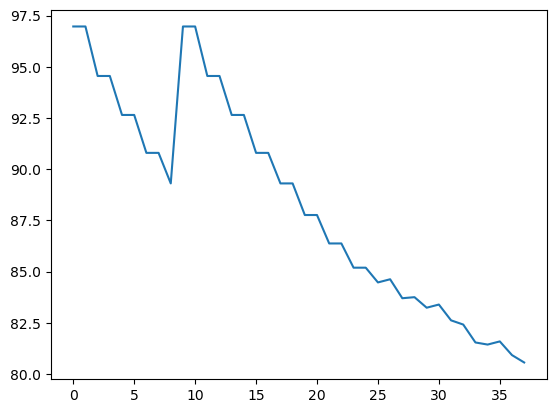

In [342]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

# Random forest

In [286]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [287]:
rf.fit(x5_tr,y5_tr)

RandomForestClassifier()

In [288]:
rf_p2=rf.predict(x5_te)
rf_p2

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [289]:
rf_cf1=confusion_matrix(rf_p2,y5_te)
rf_cf1

array([[939,   0],
       [ 25, 981]], dtype=int64)

In [290]:
rf_acc2=rf_cf1.diagonal().sum()/rf_cf1.sum()*100
rf_acc2

98.7146529562982

In [291]:
print(classification_report(rf_p2,y5_te))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       939
           1       1.00      0.98      0.99      1006

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [292]:
rf_ac2=accuracy_score(rf_p2,y5_te)

In [293]:
rf_pre=precision_score(rf_p2,y5_te)

In [294]:
rf_rec=recall_score(rf_p2,y5_te)

In [295]:
rf_f=f1_score(rf_p2,y5_te)

# ADA Boost

In [296]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [297]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [298]:
adbo.fit(x5_tr,y5_tr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [299]:
ad_p2=adbo.predict(x5_te)
ad_p2

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [300]:
ad_cf1=confusion_matrix(ad_p2,y5_te)
ad_cf1

array([[911,   0],
       [ 53, 981]], dtype=int64)

In [301]:
ad_acc2=ad_cf1.diagonal().sum()/ad_cf1.sum()*100
ad_acc2

97.27506426735218

In [302]:
print(classification_report(ad_p2,y5_te))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       911
           1       1.00      0.95      0.97      1034

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



In [303]:
adbo_ac2=accuracy_score(ad_p2,y5_te)

In [304]:
adbo_pre=precision_score(ad_p2,y5_te)

In [305]:
adbo_rec=recall_score(ad_p2,y5_te)

In [306]:
adbo_f=f1_score(ad_p2,y5_te)

# XG Boost

In [307]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [308]:
xgb.fit(x5_tr,y5_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [309]:
xgb_p2=xgb.predict(x5_te)
xgb_p2

array([1, 0, 1, ..., 1, 1, 1])

In [310]:
xgb_cf1=confusion_matrix(xgb_p2,y5_te)
xgb_cf1

array([[905,   0],
       [ 59, 981]], dtype=int64)

In [311]:
xgb_acc2=xgb_cf1.diagonal().sum()/xgb_cf1.sum()*100
xgb_acc2

96.96658097686375

In [312]:
print(classification_report(xgb_p2,y5_te))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       905
           1       1.00      0.94      0.97      1040

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



In [313]:
xgb_ac2=accuracy_score(xgb_p2,y5_te)

In [314]:
xgb_pre=precision_score(xgb_p2,y5_te)

In [315]:
xgb_rec=recall_score(xgb_p2,y5_te)

In [316]:
xgb_f=f1_score(xgb_p2,y5_te)

# SVM

In [317]:
from sklearn.svm import SVC
svc=SVC()

In [318]:
svc.fit(x5_tr,y5_tr)

SVC()

In [319]:
s_p2=svc.predict(x5_te)
s_p2

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [320]:
s_cf1=confusion_matrix(s_p2,y5_te)
s_cf1

array([[690, 202],
       [274, 779]], dtype=int64)

In [321]:
s_acc2=s_cf1.diagonal().sum()/s_cf1.sum()*100
s_acc2

75.52699228791774

In [322]:
print(classification_report(s_p2,y5_te))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       892
           1       0.79      0.74      0.77      1053

    accuracy                           0.76      1945
   macro avg       0.75      0.76      0.75      1945
weighted avg       0.76      0.76      0.76      1945



In [323]:
svm_ac2=accuracy_score(s_p2,y5_te)

In [324]:
svm_pre=precision_score(s_p2,y5_te)

In [325]:
svm_rec=recall_score(s_p2,y5_te)

In [326]:
svm_f=f1_score(s_p2,y5_te)

# Naivy Bayes

In [327]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [328]:
nb.fit(x5_tr,y5_tr)

MultinomialNB()

In [329]:
n_p2=nb.predict(x5_te)

In [330]:
n_cf1=confusion_matrix(n_p2,y5_te)


In [331]:
acc_n=n_cf1.diagonal().sum()/n_cf1.sum()*100
acc_n

68.32904884318765

In [332]:
print(classification_report(n_p2,y5_te))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       846
           1       0.75      0.67      0.70      1099

    accuracy                           0.68      1945
   macro avg       0.68      0.69      0.68      1945
weighted avg       0.69      0.68      0.68      1945



In [333]:
nb_ac2=accuracy_score(n_p2,y5_te)

In [334]:
nb_pre=precision_score(n_p2,y5_te)

In [335]:
nb_rec=recall_score(n_p2,y5_te)

In [336]:
nb_f=f1_score(n_p2,y5_te)

In [337]:
list_6=["LOGISTIC REGRESSION","DECISION TREE","KNN","RANDOM FOREST","ADA BOOST","XGBOOST","SVM","NAIVEY BAYES"]
list_7=[lg_ac2,dt_ac2,rf_ac2,adbo_ac2,xgb_ac2,K_ac2,svm_ac2,nb_ac2]
list_8=[lg_pre,dt_pre,rf_pre,adbo_pre,xgb_pre,K_pre,svm_pre,nb_pre]
list_9=[lg_rec,dt_rec,rf_rec,adbo_rec,xgb_rec,K_rec,svm_rec,nb_rec]
list_10=[lg_f,dt_f,rf_f,adbo_f,xgb_f,K_f,svm_f,nb_f]

In [338]:
d2=pd.DataFrame({"Model Name":list6,"Accuracy":list7,"Precision":list8,"Recall":list9,"F1_score":list10})
d2

,Model Name,Accuracy,Precision,Recall,F1_score
0,LOGISTIC REGRESSION,0.760411,0.793068,0.747358,0.769535
1,DECISION TREE,0.975321,1.000000,0.953353,0.976119
2,KNN,0.991260,1.000000,0.982966,0.991410
3,RANDOM FOREST,0.977378,1.000000,0.957073,0.978066
4,ADA BOOST,0.971722,1.000000,0.946911,0.972732
5,XGBOOST,0.803085,0.932722,0.742695,0.826932
6,SVM,0.751157,0.798165,0.732460,0.763902
7,NAIVEY BAYES,0.695630,0.762487,0.675700,0.716475
